<a href="https://colab.research.google.com/github/JenilDave/Hindi_Numbers_OCR/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
def store_in_text(no_of_imgs):
  X = []
  with open("/content/drive/MyDrive/Colab Notebooks/Project/Dataset/X_file2.txt","w+") as f:
    for i in range(1,no_of_imgs+1):
      #path ="/content/drive/MyDrive/Colab Notebooks/Project/Dataset/all_number/  ({j}).jpg".format(j=i)
      path = "/content/drive/MyDrive/Colab Notebooks/Project/Dataset/numbers/ ({j}).png".format(j=i)
      print("Please wait...")
      img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
      f.write(str(img.tolist())+"\n")
      print(i)
      X.append(img)
    f.close()
    print("DONE")
  return X

In [3]:
def read_from_txt(filename):
  import ast
  df = pd.read_csv("drive/MyDrive/Colab Notebooks/Project/Dataset/{filename}".format(filename=filename),sep="\n",names=["X"])
  print(df.shape)
  print(type(df["X"][0]))
  s = df.X.apply(lambda x: np.array(ast.literal_eval(x[0:])))
  return s

(17000, 1)
<class 'str'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
file is read
Y    0
Name: 2, dtype: int64


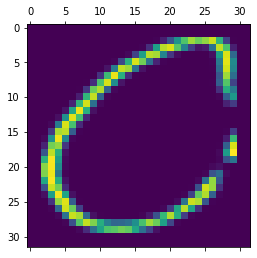

In [5]:
y = pd.read_csv("drive/MyDrive/Colab Notebooks/Project/Dataset/y_true.txt",sep="\n",names=["Y"])
#y = pd.read_csv("drive/MyDrive/Project/Dataset/aaa.txt",sep="\n")
#X = store_in_text(17000) #19880 for mixed set
X = read_from_txt("X_file2.txt")
print(X[2])
print("file is read")
plt.matshow(np.array(X[2]))
print(y.T[2])

In [6]:
y_dict = {
    0:'०',
    1:'१',
    2:'२',
    3:'३',
    4:'४',
    5:'५',
    6:'६',
    7:'७',
    8:'८',
    9:'९',
}

In [7]:
X_data = X.values
y_data = (np.array(y)).flatten()
print(X_data[1254])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


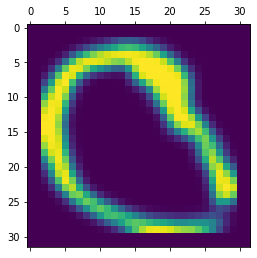

In [8]:
plt.matshow(X_data[1254])
X_data = np.array(np.array(X_data.tolist()))

All Data importing is over, now X_data consists of 32x32 pixels of Images and y_data has label. Thus we are good to go for model application.


In [9]:
unique,count = np.unique(y_data,return_counts=True)
print(unique,"\n",count)

X_train_rs = X_data.copy()
#X_train_rs = X_train_rs.reshape(len(X_train_rs),28*28)
X_train_rs = X_train_rs.reshape(len(X_train_rs),32*32)
X_train_rs =X_train_rs/255

[0 1 2 3 4 5 6 7 8 9] 
 [1700 1700 1700 1700 1700 1700 1700 1700 1700 1700]


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_rs,y_data,test_size=0.2,random_state=42)

In [11]:
unique,count = np.unique(y_train,return_counts=True)
print(unique,"\n",count)
y_train[23:70]

[0 1 2 3 4 5 6 7 8 9] 
 [1364 1376 1359 1350 1364 1361 1345 1357 1380 1344]


array([2, 8, 1, 7, 3, 6, 2, 8, 4, 5, 6, 4, 8, 2, 3, 5, 3, 9, 2, 8, 5, 9,
       1, 5, 6, 1, 2, 7, 4, 3, 3, 5, 4, 3, 9, 5, 5, 2, 3, 7, 5, 0, 2, 3,
       1, 7, 7])

In [12]:
X_train.shape

(13600, 1024)

X_train,X_test has flattened array, y_train and y_test has respective results.
Only use these 4 variables to work with any kind of data processing. Donot use other variables and donot delete any section of code.

In [14]:
#Check Normalized Values
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(1024,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5,)

Epoch 1/5
425/425 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.8590
Epoch 2/5
425/425 [==============================] - 1s 2ms/step - loss: 0.2406 - accuracy: 0.9360
Epoch 3/5
425/425 [==============================] - 1s 2ms/step - loss: 0.1932 - accuracy: 0.9501
Epoch 4/5
425/425 [==============================] - 1s 2ms/step - loss: 0.1706 - accuracy: 0.9542
Epoch 5/5
425/425 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.9581


In [17]:
model.evaluate(X_train,y_train)

425/425 [==============================] - 1s 1ms/step - loss: 0.1427 - accuracy: 0.9635


[0.14273925125598907, 0.963455855846405]

In [18]:
model.evaluate(X_test,y_test)

107/107 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9512


[0.16582436859607697, 0.9511764645576477]

Using hidden layer

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
425/425 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.8937
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9690
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9840
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9875
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.9946
Epoch 7/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.9969
Epoch 8/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9965
Epoch 9/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 10/15
425/425 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9975

In [20]:
predictions = model.predict(X_test)
predictions[0]

array([1.0617584e-05, 8.5580605e-11, 3.0928850e-04, 9.9808860e-01,
       1.3378263e-04, 8.9019537e-04, 1.0000000e+00, 9.8221588e-01,
       3.2102925e-01, 7.1768463e-03], dtype=float32)

In [ ]:
num=6
print("Predicted: ",predictions.argmax(axis=1)[num])
print("Expected: ",y_test[num])

Predicted:  4
Expected:  4


In [ ]:
y_test

array([1, 9, 5, ..., 6, 4, 5])

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Project/Dataset/print1.jpg",cv2.IMREAD_GRAYSCALE)
plt.matshow(img)
img = (img.reshape((1,28*28)))/255
p = model.predict(img)
p.argmax(axis=1)[0]

ValueError: ignored

In [ ]:
model.get_weights()

[array([[-0.0842783 ,  0.05893093, -0.02096999, ..., -0.00232792,
         -0.07655926,  0.03184531],
        [ 0.0313442 ,  0.0832223 , -0.06022548, ...,  0.11073768,
         -0.00694748,  0.0585062 ],
        [-0.00364434,  0.02477206,  0.09514723, ...,  0.03578733,
         -0.04193212, -0.02389897],
        ...,
        [-0.07227679,  0.03340551,  0.01679436, ...,  0.04368691,
         -0.09582759,  0.00521188],
        [-0.03275241, -0.00823263, -0.02432072, ...,  0.03706825,
         -0.0361196 ,  0.07127643],
        [-0.12781654, -0.04154991, -0.02765792, ...,  0.02904124,
         -0.0984021 ,  0.04043305]], dtype=float32),
 array([-0.05515109,  0.01441041, -0.01083849,  0.03560713,  0.00828922,
        -0.01595252, -0.01749647,  0.04557189, -0.04586743,  0.03545048],
       dtype=float32)]

In [21]:
model.save("/content/drive/MyDrive/Colab Notebooks/Project/Dataset/models/digits.h5")
#tf.saved_model.save(model,"/content/drive/MyDrive/Colab Notebooks/Project/Dataset/models/")